# **Sprawozdanie Sygnały i obrazy cyfrowe Maciej Kujawa nr.264201**
#  Rozwinięcia ortogonalne w przetwarzaniu i kompresji obrazów
Orginalny obraz użyty do wszystkich przekształceń:






![lena.tif](https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png)


## Wstęp



### Czym jest ortogonalność?

- Ortogonalność wektorów

 Ortogonalność jest uogólnionym pojęciem prostopadłości. Jeśli iloczyn skalarny wektorów $x$ oraz $y$, należacych do tej samej przestrzeni $H$, jest równy 0, to mówimy że są one ortogonalne.

$$⟨x, y⟩ = 0 → x ⊥ y$$

- Ortogonalność funkcji ciagłych i dyskretnych

  Iloczynem sklaranym 2 funkcji ci  ̨agłych $f(x)$ i $g(x)$ jest całka określona z iloczynu tych funkcji. Dla funkcji dyskrentych zamiast całki używana jest suma iloczynu 2 funkcji.

 $$\int_{a}^{b} f(x)g(x)dx = 0 \rightarrow f(x) \bot g(x)$$

 $$\sum_a^b h(x_i)r(x_i)dx = 0 \rightarrow h(x_n) \bot r(x_n)$$



### Czym jest rozwinięcie ortogonalne?
- Zbiór ortogonany

 Jest to zbiór funkcji, które są wzajemnie ortogonalne do siebie.
 $$\{\theta_0,\theta_1,\theta_2,\dots, \theta_n\}, \langle \theta_j, \theta_k \rangle=0, k\neq j$$


- Rozwinięcie ortogonalne

 Jest to sposób przedstawienia funkcji jako szeregu zbioru ortogonalnego przemnozonego przez konkretną wagę $c$.

 $$f(x)=c_0\theta_0+c_1\theta_1+c_2\theta_2+\dots+c_n \theta_n = \sum_{N=0}^\infty c_N \theta_N$$


### Co to nam daje?
Przechodząc na funkcji dyskretnych, których jest wykorzystywany w orbazach cyfrowych
otrzymujemy zalezność:

 $$\theta_k =  \sum_{n=0}^{n-1} c_{k,n} x_n \textrm{  ,gdzie  } k=0,1,N-1$$

co moze byc zapisane w postaci macierzowej:

$$\theta = C_x$$

Jesli macierz C jest ortonormalna to zachodzi zależność:

$$C^{-1}=C^T \textrm{  to  } x=C^T\theta$$

Wykorzystania
- Kompresja stratna
- Kompresja bezstratna
- Filtry uwypuklajace konkretne własnosci sygnału  ́
- Filtry usuwajace zakłócenia z sygnału

## Aproksymacja Fouriera

### Transformacja Fourier’a

FT pozwala na przedstawienie funkcji okresowej jako szereg wazonych funkcji trygonometrycznych, dzięki czemu poznajemy sposób w jaki częstotliwosci składają się na pierwotną funkcję.

$$F(s)=\int_{-\infty}^{\infty}f(x) \cdot e ^{-2\pi ixs}dx$$

Podczas transformacji obrazów tj.: dwuwymiarowych sygnałów dyskretnych, wymagana jest DFT.

$$X_k = \sum_{n=0}^{N-1}x_n\cdot e^{-\frac{2\pi i}{N}nk}$$

**Ćwiczenie 1**

Dodaj niezbędne biblioteki takie jak: numpy, matplotlib.pyplot, sklearn, os, pywt, pywt.data, cv2

oraz "from google.colab.patches import cv2_imshow"


```
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pywt
import pywt.data
import cv2
```




Oto kod realizujący poniższe zadanie:

In [ ]:

import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os
import pywt
import pywt.data
import urllib.request

# TUTAJ DODAJ SWÃ“J KOD

**Ćwiczenie 2**

Napisz funkcję `highPassFiltering`, która realizuje zadanie filtru górnoprzepustowego



```
def highPassFiltering(img, size):
    """
    Parametrami transferu są widmo transformaty Fouriera i rozmiar filtra
    """
    h, w =          # Uzyska wysokość i szerokość obrazu
    h1,w1 =         # Znajdź punkt środkowy widma Fouriera
                    # Punkt środkowy plus lub minus połowa rozmiaru filtra,
                    # tworząc rozmiar filtra, który określa rozmiar, a
                    # następnie ustawia się na 0
    
    return img

```




Oto kod realizujący poniższe zadanie:

In [ ]:
def highPassFiltering(img, size):
    """
    Parametrami transferu sÄ… widmo transformaty Fouriera i rozmiar filtra
    """
    h, w = img.shape[0:2]
    h1, w1 = int(h / 2), int(w / 2)
    img[h1:h1+int(size/2), w1:w1+int(size / 2)] = 0
    img[h1:h1+int(size/2), w1-int(size / 2):w1] = 0
    img[h1-int(size/2):h1, w1:w1+int(size / 2)] = 0
    img[h1-int(size/2):h1,w1-int(size / 2):w1] = 0
    return img
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png','lena.png')
t=cv2.imread('lena.png')
p=highPassFiltering(t,100)
cv2_imshow(p)



Napisana funkcja realizuje idee filtru górnoprzepustowego - wycina z obrazu kwadrat na środku o podanym rozmiarze krawędzi.Oto obraz po zastosowaniu filtra górnoprzepustowego dla size=100:




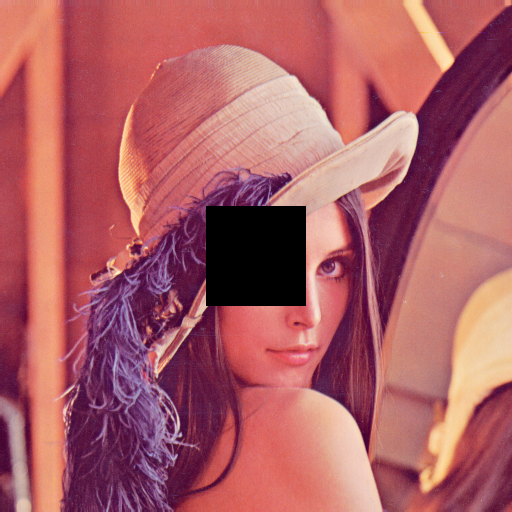




Ten filtr stosuje się do odcięcia niższych częstotliwości w widmach sygnałów.



**Ćwiczenie 3**

Wykorzystaj funkcję `lowPassFiltering`, która realizuje zadanie filtru dolnoprzepustowego

```
def lowPassFiltering(img,size):

    h, w = img.shape[0:2]
    h1, w1 = int(h / 2), int(w / 2)  
    img[0:h, 0:w1 - int(size / 2)] = 0
    img[0:h, w1 + int(size / 2):w] = 0
    img[0:h1 - int(size / 2), 0:w] = 0
    img[h1 + int(size / 2):h, 0:w] = 0

    return img

```


Oto kod realizujący poniższe zadanie:

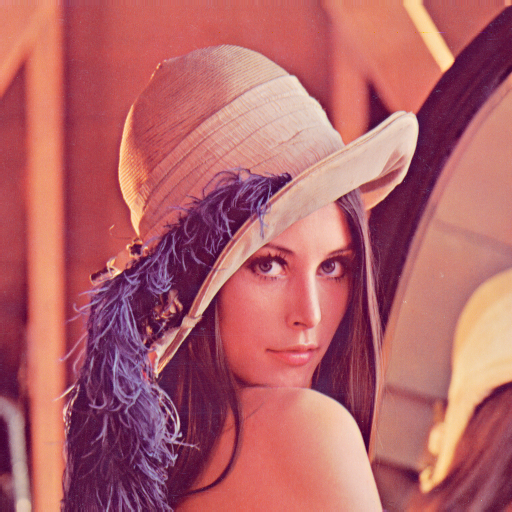

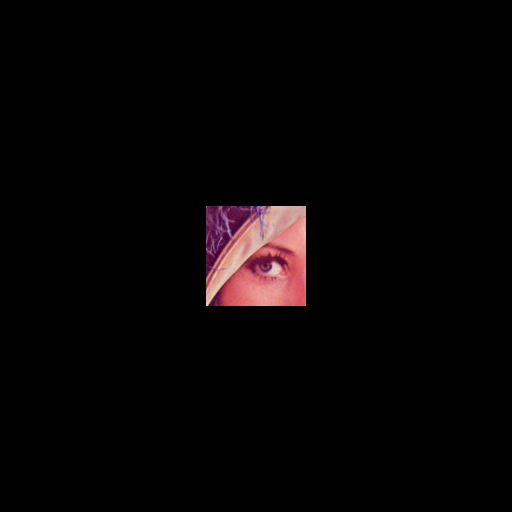

In [ ]:

def lowPassFiltering(img,size):

    h, w = img.shape[0:2]
    h1, w1 = int(h / 2), int(w / 2)
    img[0:h, 0:w1 - int(size / 2)] = 0
    img[0:h, w1 + int(size / 2):w] = 0
    img[0:h1 - int(size / 2), 0:w] = 0
    img[h1 + int(size / 2):h, 0:w] = 0
    return img
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png','lena.png')
t=cv2.imread('lena.png')
cv2_imshow(t)
p=lowPassFiltering(t,100)
cv2_imshow(p)


Napisana funkcja realizuje idee filtru dolnoprzepustowego - wycina z obrazu wszystko poza kwadratem na środku o krawędzi długości size. Oto obraz po zastosowaniu filtra dolnoprzepustowego dla size=100:


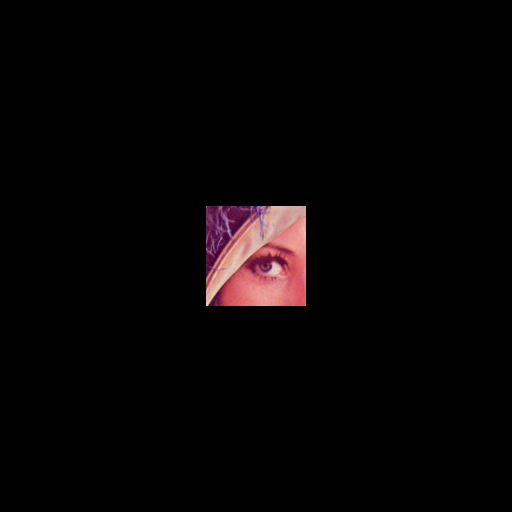

Ten filtr stosuje się do odcięcia wyższych częstotliwości w widmach sygnałów.


**Ćwiczenie 4**

- Wczytaj zdjęcie Leny: https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
- Zmień zdjęcie na odcienie szarości (`cv2.cvtColor` `cv2.COLOR_BGR2GRAY`)
- Na zdjęciu oblicz dwuwymiarową dyskretną transformatę Fouriera.(`numpy.fft.fft2`)
- Przesuń domenę częstotliwości z lewej górnej części na środek (`numpy.fft.fftshift`)
- Wysołaj przygotowane wcześniej funkcje (raz `highPassFiltering`, a za drugi razem `lowPassFiltering` z różnymi parametrami)
- Wywołaj poniższe linijki kodu:


```
# res = np.log(np.abs(dft_shift))

# Odwrotna transformacja Fouriera
idft_shift = np.fft.ifftshift(dft_shift)  # Przesunięcie dziedziny częstotliwości ze środka do lewego górnego rogu
ifimg = np.fft.ifft2(idft_shift)          # Wywołanie funkcji biblioteki Fourier
ifimg = np.abs(ifimg)
```

- A następnie wyświetl efekt przed i po filtracji

Oto kod realizujący poniższe zadanie:

In [ ]:
def highPassFiltering(img, size):
    """
    Parametrami transferu sÄ… widmo transformaty Fouriera i rozmiar filtra
    """
    h, w = img.shape[0:2]
    h1, w1 = int(h / 2), int(w / 2)
    img[h1:h1+int(size/2), w1:w1+int(size / 2)] = 0
    img[h1:h1+int(size/2), w1-int(size / 2):w1] = 0
    print(h)
    img[h1-int(size/2):h1, w1:w1+int(size / 2)] = 0
    img[h1-int(size/2):h1,w1-int(size / 2):w1] = 0
    return img
gray = cv2.imread('lena.png')     # TUTAJ DODAJ SWÃ“J KOD
gray =cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)      # TUTAJ DODAJ SWÃ“J KOD
cv2_imshow(gray)
img_dft =np.fft.fft2(gray)   # TUTAJ DODAJ SWÃ“J KOD
cv2_imshow(img_dft)
dft_shift = np.fft.fftshift(img_dft)
#dft_shift=  # TUTAJ DODAJ SWÃ“J KOD
res = 20*np.log(np.abs(dft_shift))
cv2_imshow(res)
dft_shift=lowPassFiltering(dft_shift,200)
res = 20*np.log(np.abs(dft_shift))
cv2_imshow(res)

# Odwrotna transformacja Fouriera
idft_shift = np.fft.ifftshift(dft_shift)  # PrzesuniÄ™cie dziedziny czÄ™stotliwoÅ›ci ze Å›rodka do lewego gÃ³rnego rogu
ifimg = np.fft.ifft2(idft_shift)          # WywoÅ‚anie funkcji biblioteki Fourier
ifimg = np.abs(ifimg)
cv2_imshow(ifimg)

Powyższy kod pokazuje praktyczne zastosowanie filtrów górnoprzepustowego i dolnoprzepustowego w przetwarzaniu obrazów do odcięcia odpowiednich częstotliwości w obrazach. Na początku podany obraz zostaje przekształcony na odcienie szarości:

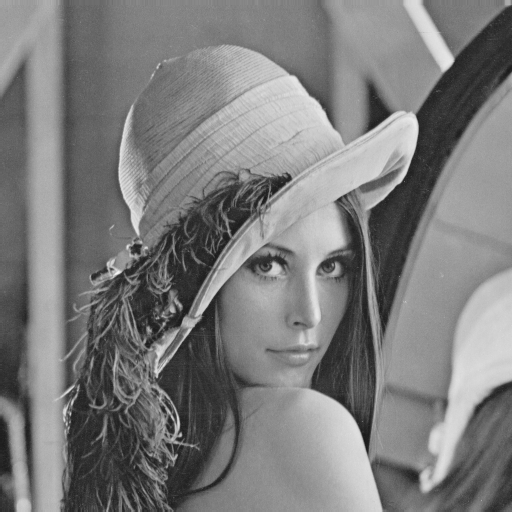

Następnie przekształca się obraz w odcieniach szarości dyskretną transformatą Fouriera, żeby uzyskać go w dziedzinie częstotliwości:




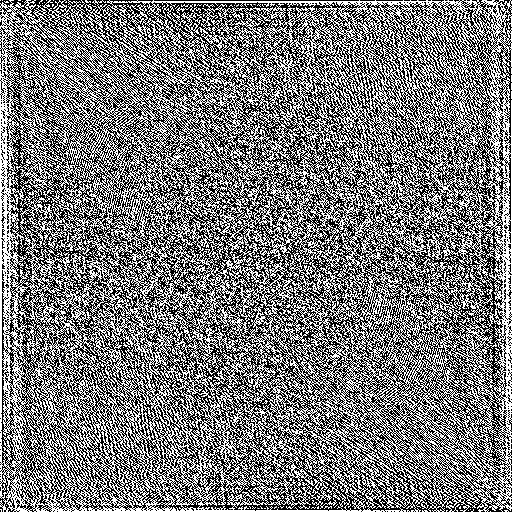

Później następuje przesunięcie domeny częstotliwości tak, aby niskie częstotliwości znajdowały się na środku widma:



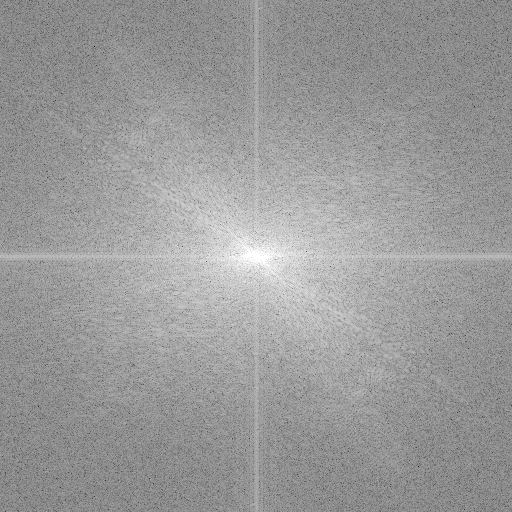

Następnie stosujemy dany filtr, żeby odciąć odpowiednie częstotliwości. Oto zastosowanie filtru dolnoprzepustowego przy size=200 dla obrazu w dziedzinie częstotliwości:



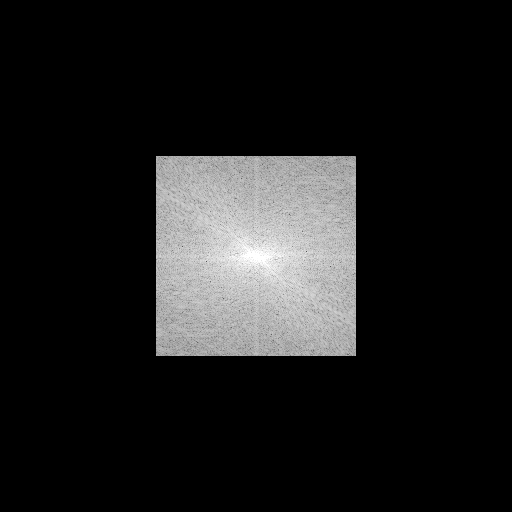

Oto zastosowanie filtru górnoprzepustowego przy size=25 dla obrazu w dziedzinie częstotliwości:

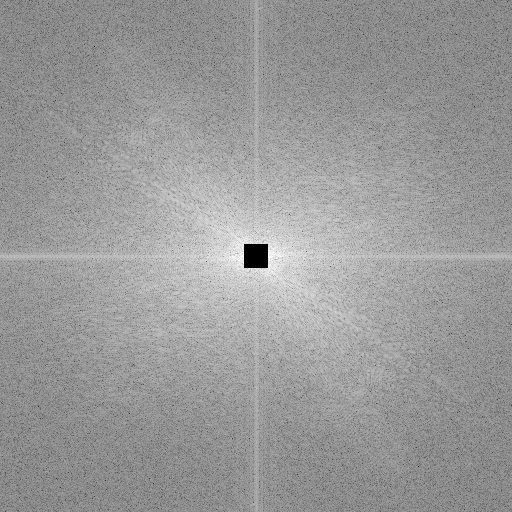

Do uzyskania obrazu z odpowiednio odciętymi częstotliwościami trzeba przekształcić go odwrotną transformatą Fouriera. Oto obraz po odcięciu niższych częstotliwości filtrem dolnoprzepustowym przy size=200:

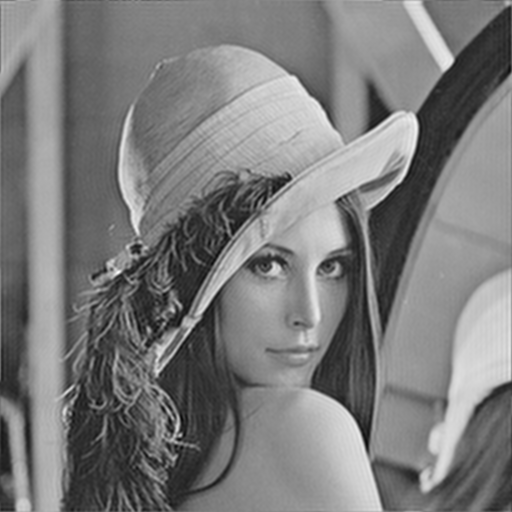

Oto obraz po odcięciu wyższych częstotliwości filtrem górnoprzepustowym przy size=25:

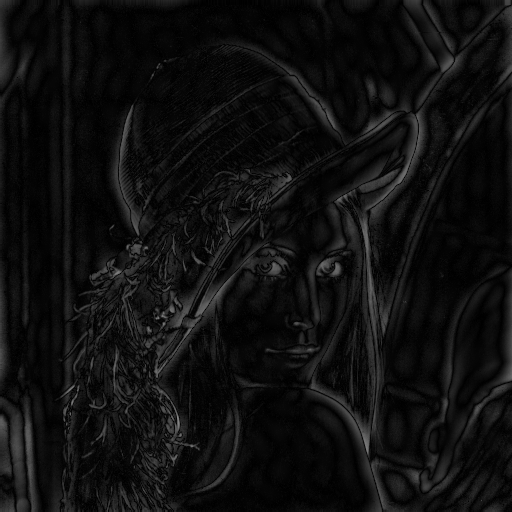

Filtr dolnoprzepustowy odcina częstotliwości wyższe przez co obraz, który powstaje w wyniku powyższego przekształcenia ma bardzo wygładzone kontury obiektów na nim lub ich nie ma. Może on być używany w praktyce do odszumiania obrazów szumów typu "salt and pepper", ponieważ występują one w wysokich częstotliwościach. Filtr górnoprzepustowy odcina częstotliwości niskie przez co obraz, który powstaje w wyniku jego działania w dziedzinie częstotliwości zawiera tylko kontury obiektów znajdujących się na nim. Z powyższego powodu ten filtr może zostać wykorzystany w systemie wizyjnym robota do wykrywania przeszkód na jego drodze. Oba z tych filtrów są często stosowane przy mixie i masteringu utworów muzycznych w tzw. equalizerach. Wynika to z faktu, że dla ludzi niektóre częstotliwości są uznawane jako przyjemne do odsłuchu, a inne nie, więc w nagraniach wokalnych często zostawia się odpowiednie tony, żeby nie było słychać szumów, a  wokal brzmiał pełniej.

## DCT



### Dyskretna transformacja cosinusowa
Proces kompresji obrazu z wykorzystaniem DCT polega na przypisaniu wartosci współczynników do odpowiadających im funkcji stworzonych z dodanych do siebie cosinusów.

### Działania na macierzach

#### Macierz wspolczyninikow i kwantyzacji

Dzięki procesowi kwantyzacji mozemy zachować tylko najbardziej istotne części macierzy współczynników co znacząco zmniejsza rozmiar potrzebnej do przesłania informacji.

**Ćwiczenie 5**

- Poniżej przykład implementacji DCT wykorzystującej biliotekę scipy. Wyświelt efekt jej działania
- **DODAKTOWE:** Zaimplementuj własne DCT

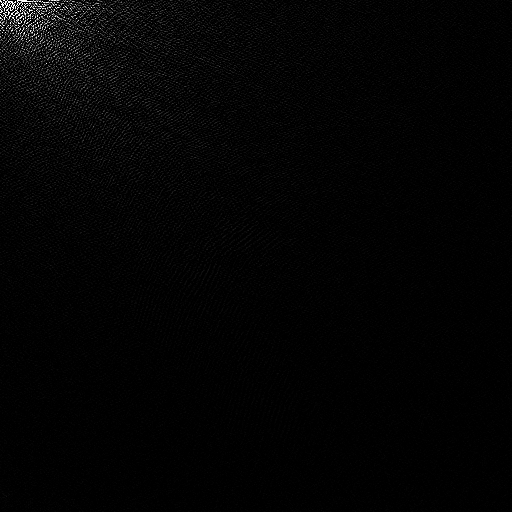

In [ ]:
from scipy.fftpack import dct, idct
import math
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

# Implementacja 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# Implementacja 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png','lena.png')
gray = cv2.imread('lena.png')     # TUTAJ DODAJ SWÃ“J KOD
im =cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)      # TUTAJ DODAJ SWÃ“J KOD
imF = dct2(im)
im1 = idct2(imF)
cv2_imshow(imF)
# TUTAJ NAPISZ SÃ“WJ KOD

Dysktretna transformata cosinusowa jest wykorzystywana do kompresji danych w dla popularnych formatów zapisu plików. Polega na przypisaniu wartosci współczynników do odpowiadających im funkcji stworzonych z dodanych do siebie cosinusów według wzoru:
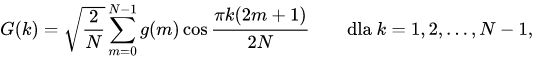



Oto uzyskanu rezultat:



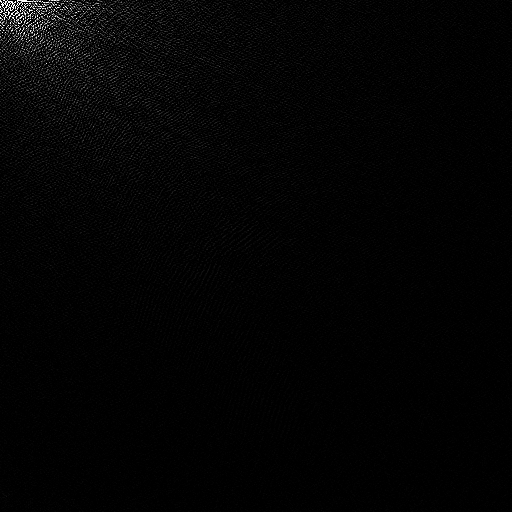

## Transformacja falkowa

### Czym jest transformacja falkowa?
Transformacja falkowa jest podobna do transformacji Fouriera, poniewaz obie pozwalają analizę sygnału w dziedzinie częstotliwosci. Jednak o ile transformata Fouriera rozkłada sygnał na poszczególne częstotliwosci, nie przedstawia ona informacji na temat stanu sygnału w czasie.

### Opis działania

Transformacja polega na przedstawieniu sygnału za pomocę falek, to znaczy: jednej funkcji falowej, oraz kolejnych zbudowanych z jądra za pomocą przesunięć i skalowań (zmiany szerokosci falki podstawowej).

$$ F(\tau,s)=\frac{1}{\sqrt{s}}\int_{-\infty}^{\infty}f(t)\psi\star \left(\frac{t-\tau}{s} \right)dt$$

$$D(a,b)=\frac{1}{\sqrt{b}} \sum_{m=0}^{p-1}f(t_m)\psi\left(\frac{t_m-a}{b}\right)$$

**Ćwiczenie 6**

- Korzystając z poniższego kod|u, wyjaśnij działanie transformacji falkowej na zdjęciu

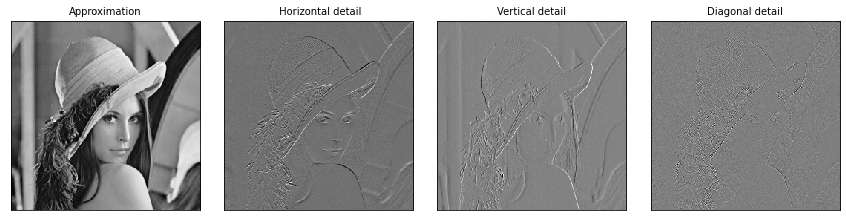

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pywt
import pywt.data
import cv2
# Load image
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png','lena.png')


def DWT(data, max_level):
    LL=data
    for level in range(max_level):
        new_data = LL
        size=LL[1].size/2
        size = int(size)
        LL = np.zeros((size,size))
        LH = np.zeros((size,size))
        HL = np.zeros((size,size))
        HH = np.zeros((size,size))
        for x in range(0,size*2,2):
           for y in range(0,size*2,2):
                LL[x//2][y//2] = (new_data[x][y] + new_data[x][y+1] + new_data[x+1][y] + new_data[x+1][y+1])/4
                LH[x//2][y//2] = (new_data[x][y] + new_data[x][y+1] - new_data[x+1][y] - new_data[x+1][y+1])/4
                HL[x//2][y//2] = (new_data[x][y] - new_data[x][y+1] + new_data[x+1][y] - new_data[x+1][y+1])/4
                HH[x//2][y//2] = (new_data[x][y] - new_data[x][y+1] - new_data[x+1][y] + new_data[x+1][y+1])/4
        return LL, (LH,HL,HH)



img_name = "lena.png"
original = cv2.imread(os.getcwd() + "/" + img_name,cv2.IMREAD_GRAYSCALE)
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original,"haar")
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.savefig("result_" + img_name )

Transformata falkowa może być używana do aproksymacji i wycinania odpowiednich częstotliwości uzależnioznych od położenia ich na orginalnym widmie. Generuje ona obraz poprzez użycie falek odpowiednio przesuniętych i przeskalowanych (tzw. falek Haara). W powyższym przykładzie generuje cztery obrazy:

*   Zaproksymowany
*   Z odciętymi wartościami w orientacji poziomej
*   Z odciętymi wartościami w orentacji pionowej
*   Z odciętymi wartościami w orientacji diagonalnej

Robi to poprzez odpowiednie przekształcenia na najbliższych sąsiadach danych pixeli, kolejno:


*   Średnia z najbliższych sąsiadów (3) i samego pixela
*   Suma pixela przekształcanego z pixelem odległym od niego o 1 jednostkę w dół z odjętymi dwoma pozostałymi pixelami podzielona przez 4
*   Suma pixela odległoego od przekształcanego o 1 jednostkę w lewo z pixelem odległym od niego o 1 jednostkę w dół i prawo z odjętymi dwoma pozostałymi pixelami podzielona przez 4
*   Suma pixela przekształcanego z pixelem odległym od niego o 1 jednostkę w dół i prawo z odjętymi dwoma pozostałymi pixelami podzielona przez 4.



 Te przekształcenia są wykonywane tyle razy, ile wynosi max_level. Oto uzyskane rezultaty:  










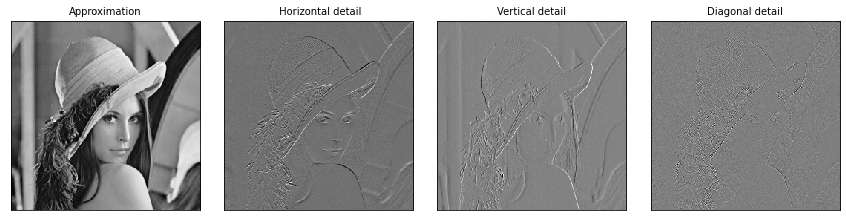

## Literatura

1. Monson H. Hayes , "Digital signal Processing - Second Edition"
2. Aristidi, Eric , Representation of signals as series of orthogonal functions"
3. Computerphile , "JPEG DCT, Discrete Cosine Transform (JPEG Pt2)- Computer-
phile", https://www.youtube.com/watch?v=Q2aEzeMDHMAt
4. Randall Hoven,"42 Orthogonal Expansion",https://www.youtube.com/watch?v=6ln4fQgYPu0
5. Wikipedia , wikipedia.org
6. Andrew Nicoll , "The Wavelet Transform for Beginners",
https://www.youtube.com/watch?v=kuuUaqAjeoA
7. Irena Herda, Maciej Łoziczonek, http://www2.im.uj.edu.pl/katedry/seminaria/inda/wp-
content/uploads/2010.03.19.Herda.Lozioczonek.pdf
8. Krystian Pyka, https://home.agh.edu.pl/ zfiit/publikacjepliki/P yka_2004a.pdf